In [1]:
# calcular mediante una regresion lineal las ventas de ticket de una pelicula

In [56]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('seaborn-dark')

In [18]:
peliculas = pd.read_csv("movies.csv")

In [19]:
peliculas.head()

,franquicia,presupuesto,genero,pagina_web,imdb_id,lenguaje,popularidad,productores,pais,fecha_estreno,ventas,duracion,estado,titulo,puntuacion,n_votos
0,Father of the Bride Collection,NaN,Comedy,NaN,tt0113041,en,8.387519,Sandollar Productions,United States of America,1995-02-10,76578911.0,106.0,Released,Father of the Bride Part II,5.7,173.0
1,NaN,NaN,Drama,NaN,tt0112749,en,0.894647,Miramax,South Africa,1995-12-15,676525.0,106.0,Released,"Cry, the Beloved Country",6.7,13.0
2,Friday Collection,3500000.0,Comedy,http://www.newline.com/properties/friday.html,tt0113118,en,14.569650,New Line Cinema,United States of America,1995-04-26,28215918.0,91.0,Released,Friday,7.0,513.0
3,NaN,NaN,Comedy,NaN,tt0115697,en,8.963037,Paramount Pictures,United States of America,1996-02-01,32.0,87.0,Released,Black Sheep,6.0,124.0
4,NaN,12000000.0,Comedy,NaN,tt0116483,en,9.592265,Universal Pictures,United States of America,1996-02-16,41205099.0,92.0,Released,Happy Gilmore,6.5,767.0


In [5]:
# Seleccionar como columnas independientes solo las númericas y los valores NaN llenarlos con 0
# tips: de numpy se puede utilizar select_dtypes y fillna

In [20]:
peliculas.shape

(1349, 16)

In [21]:
# REvisar cuantos valores NaB tiene cada columna
print(peliculas.dtypes)
print(len(peliculas)-peliculas.count())

franquicia        object
presupuesto      float64
genero            object
pagina_web        object
imdb_id           object
lenguaje          object
popularidad      float64
productores       object
pais              object
fecha_estreno     object
ventas           float64
duracion         float64
estado            object
titulo            object
puntuacion       float64
n_votos          float64
dtype: object
franquicia       1153
presupuesto       591
genero             51
pagina_web        967
imdb_id             0
lenguaje            0
popularidad         0
productores       212
pais               99
fecha_estreno       1
ventas            141
duracion            8
estado              1
titulo              0
puntuacion          0
n_votos             0
dtype: int64


In [22]:
peliculas_noNaN = peliculas.fillna(0)

In [23]:
# REvisar cuantos valores NaB tiene cada columna
print(peliculas_noNaN.dtypes)
print(len(peliculas_noNaN)-peliculas_noNaN.count())

franquicia        object
presupuesto      float64
genero            object
pagina_web        object
imdb_id           object
lenguaje          object
popularidad      float64
productores       object
pais              object
fecha_estreno     object
ventas           float64
duracion         float64
estado            object
titulo            object
puntuacion       float64
n_votos          float64
dtype: object
franquicia       0
presupuesto      0
genero           0
pagina_web       0
imdb_id          0
lenguaje         0
popularidad      0
productores      0
pais             0
fecha_estreno    0
ventas           0
duracion         0
estado           0
titulo           0
puntuacion       0
n_votos          0
dtype: int64


In [24]:
peliculas_noNaN.head()

,franquicia,presupuesto,genero,pagina_web,imdb_id,lenguaje,popularidad,productores,pais,fecha_estreno,ventas,duracion,estado,titulo,puntuacion,n_votos
0,Father of the Bride Collection,0.0,Comedy,0,tt0113041,en,8.387519,Sandollar Productions,United States of America,1995-02-10,76578911.0,106.0,Released,Father of the Bride Part II,5.7,173.0
1,0,0.0,Drama,0,tt0112749,en,0.894647,Miramax,South Africa,1995-12-15,676525.0,106.0,Released,"Cry, the Beloved Country",6.7,13.0
2,Friday Collection,3500000.0,Comedy,http://www.newline.com/properties/friday.html,tt0113118,en,14.569650,New Line Cinema,United States of America,1995-04-26,28215918.0,91.0,Released,Friday,7.0,513.0
3,0,0.0,Comedy,0,tt0115697,en,8.963037,Paramount Pictures,United States of America,1996-02-01,32.0,87.0,Released,Black Sheep,6.0,124.0
4,0,12000000.0,Comedy,0,tt0116483,en,9.592265,Universal Pictures,United States of America,1996-02-16,41205099.0,92.0,Released,Happy Gilmore,6.5,767.0


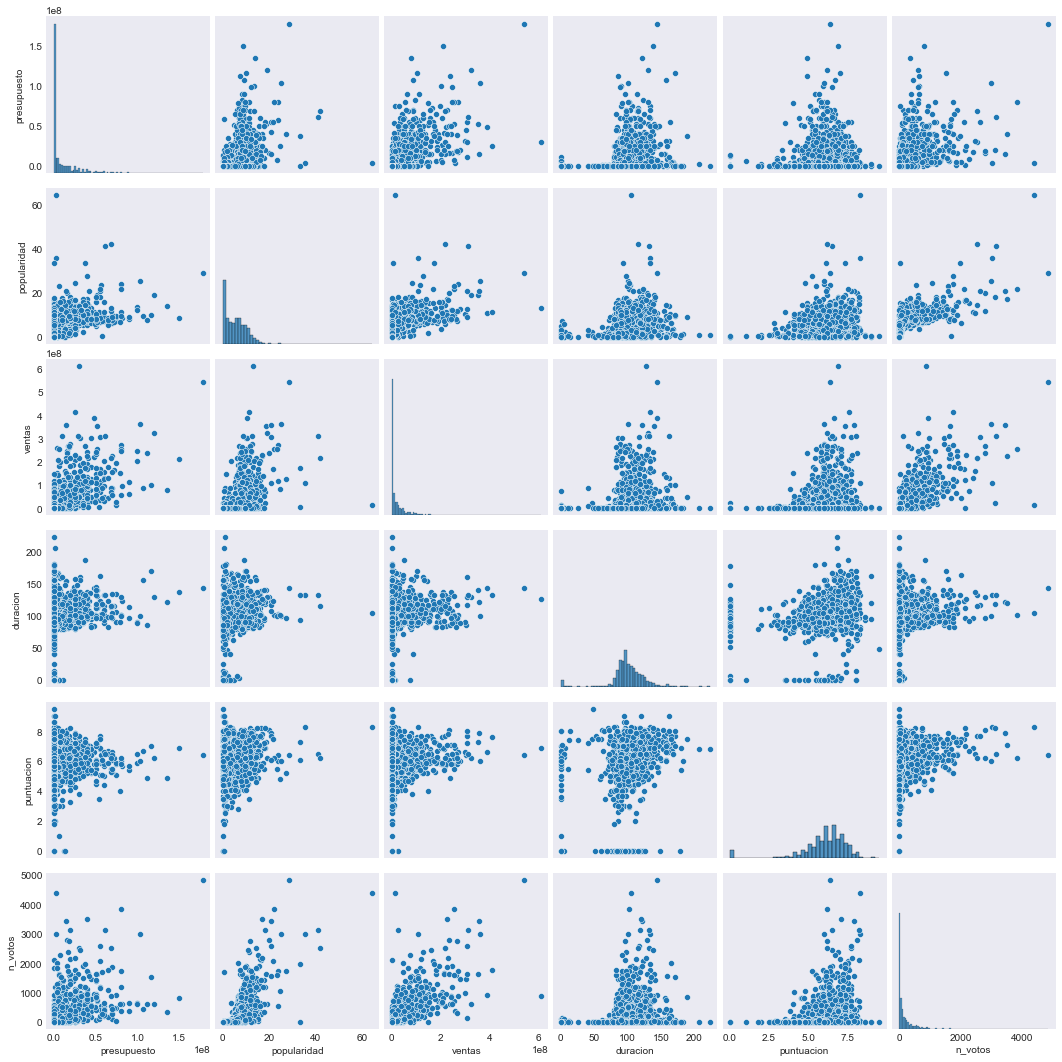

In [57]:
sns.pairplot(peliculas_noNaN)

In [74]:
X = peliculas_noNaN[['presupuesto','popularidad','duracion','puntuacion','n_votos']]
y = peliculas_noNaN[['ventas']]

In [75]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [77]:
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

In [78]:
predicciones = lm.predict(X_test)
predicciones

array([[ 1.03518073e+07],
       [ 2.54337440e+07],
       [ 3.50468424e+07],
       [ 7.83413291e+05],
       [ 5.08667109e+06],
       [ 3.78282293e+06],
       [ 5.32789679e+05],
       [ 7.88877655e+06],
       [ 2.04180093e+07],
       [ 4.11765269e+07],
       [ 9.65347345e+07],
       [ 7.01224901e+05],
       [ 1.08727704e+08],
       [ 1.69072547e+07],
       [ 3.89024575e+05],
       [ 5.27539731e+07],
       [ 3.54081721e+07],
       [ 1.96608274e+06],
       [ 4.91893723e+06],
       [ 2.93791711e+06],
       [ 8.91464875e+07],
       [ 4.66203231e+07],
       [ 3.04622777e+06],
       [ 2.14578855e+06],
       [ 6.05346536e+06],
       [ 9.40204526e+06],
       [ 1.91046893e+06],
       [ 6.37194285e+06],
       [ 1.00820002e+07],
       [ 1.22255269e+08],
       [ 3.92624687e+06],
       [ 5.76559430e+06],
       [ 9.35285318e+05],
       [ 3.04960356e+07],
       [ 2.59193349e+07],
       [ 1.49734710e+08],
       [ 2.69604516e+07],
       [ 1.57631396e+06],
       [ 7.5

In [79]:
from sklearn import metrics
import numpy as np
# errores
def rmse(objetivo, estimaciones):
    return np.sqrt(metrics.mean_squared_error(objetivo, estimaciones))
def mse(objetivo, estimaciones):
    return metrics.mean_squared_error(objetivo, estimaciones)
def mae(objetivo, estimaciones):
    return metrics.mean_absolute_error(objetivo, estimaciones)
def evaluar_modelo(objetivo,estimaciones):
    return{"rmse":rmse(objetivo,estimaciones),"mse":mse(objetivo,estimaciones), "mae":mae(objetivo, estimaciones)}

In [80]:
evaluar_modelo(y_test, predicciones)

{'rmse': 47352903.64093136,
 'mse': 2242297483227330.8,
 'mae': 20967187.102188785}

In [64]:
from sklearn.model_selection import cross_validate

In [50]:
score_error = {"mae":"neg_mean_absolute_error", "rmse":"neg_root_mean_squared_error","mse":"neg_mean_squared_error"}
resultados_cvalidate = cross_validate(estimator=lm, X=X,y=y,
                                     scoring=score_error,cv=50,
                                     return_train_score=False)

In [65]:
pd.DataFrame(resultados_cvalidate).mean()

fit_time      2.752657e-03
score_time    3.650079e-03
test_mae     -2.292910e+07
test_rmse    -3.755215e+07
test_mse     -1.890936e+15
dtype: float64